In [1]:
import pandas as pd
import numpy as np
import sys
import os


In [2]:
sys.path.append(os.path.abspath('../scripts'))

In [3]:
from data_analysis_and_preprocessing import (handle_missing_values,remove_duplicates,correct_data_types,
                                             univariate_analysis,bivariate_analysis,convert_ip_to_int,merge_ip_country,
                                             feature_engineering,encode_categorical_features,normalize_and_scale,plot_correlation_matrix)

In [4]:
# Load the datasets and  Read CSV files
credit_card_df = pd.read_csv('../data/creditcard.csv')
fraud_df = pd.read_csv('../data/Fraud_Data.csv')
ip_address_df = pd.read_csv('../data/IpAddress_to_Country.csv')

In [5]:
# Display the first few rows of each dataset to understand the structure
credit_card_df.head() 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
fraud_df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [6]:
ip_address_df.head()

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


In [7]:
# Step 1: Handle missing values
fraud_df_cleaned, missing_vals = handle_missing_values(fraud_df)
print("Missing Values:\n", missing_vals)

Missing Values:
 user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64


In [8]:
# remove duplicates
fraud_df_cleaned = remove_duplicates(fraud_df_cleaned)
print("Cleaned Data (First 5 Rows):\n", fraud_df_cleaned.head())

Cleaned Data (First 5 Rows):
    user_id          signup_time        purchase_time  purchase_value  \
0    22058  2015-02-24 22:55:49  2015-04-18 02:47:11              34   
1   333320  2015-06-07 20:39:50  2015-06-08 01:38:54              16   
2     1359  2015-01-01 18:52:44  2015-01-01 18:52:45              15   
3   150084  2015-04-28 21:13:25  2015-05-04 13:54:50              44   
4   221365  2015-07-21 07:09:52  2015-09-09 18:40:53              39   

       device_id source browser sex  age    ip_address  class  
0  QVPSPJUOCKZAR    SEO  Chrome   M   39  7.327584e+08      0  
1  EOGFQPIZPYXFZ    Ads  Chrome   F   53  3.503114e+08      0  
2  YSSKYOSJHPPLJ    SEO   Opera   M   53  2.621474e+09      1  
3  ATGTXKYKUDUQN    SEO  Safari   M   41  3.840542e+09      0  
4  NAUITBZFJKHWW    Ads  Safari   M   45  4.155831e+08      0  


In [9]:
# Step 2: Correct data types
fraud_df_cleaned = correct_data_types(fraud_df_cleaned)
print("Data Types:\n", fraud_df_cleaned.dtypes)


Data Types:
 user_id                    int64
signup_time       datetime64[ns]
purchase_time     datetime64[ns]
purchase_value             int32
device_id               category
source                  category
browser                 category
sex                     category
age                        int32
ip_address                 int32
class                      int64
dtype: object


In [10]:
# Step 3: Exploratory Data Analysis
univariate_stats = univariate_analysis(fraud_df_cleaned)
print("Univariate Analysis (Summary Statistics):\n", univariate_stats)


Univariate Analysis (Summary Statistics):
              user_id                    signup_time  \
count  151112.000000                         151112   
mean   200171.040970  2015-04-20 00:56:09.511329280   
min         2.000000            2015-01-01 00:00:42   
25%    100642.500000     2015-02-18 09:52:48.500000   
50%    199958.000000            2015-04-19 04:41:30   
75%    300054.000000  2015-06-18 14:47:22.750000128   
max    400000.000000            2015-08-18 04:40:29   
std    115369.285024                            NaN   

                       purchase_time  purchase_value            age  \
count                         151112   151112.000000  151112.000000   
mean   2015-06-16 02:56:38.759952896       36.935372      33.140704   
min              2015-01-01 00:00:44        9.000000      18.000000   
25%       2015-04-18 14:41:25.500000       22.000000      27.000000   
50%       2015-06-18 13:46:17.500000       35.000000      33.000000   
75%       2015-08-17 18:48:31.50000

In [11]:
bivariate_corr = bivariate_analysis(fraud_df_cleaned)
print("Bivariate Analysis (Correlation Matrix):\n", bivariate_corr)


Bivariate Analysis (Correlation Matrix):
           user_id     class
user_id  1.000000  0.001945
class    0.001945  1.000000


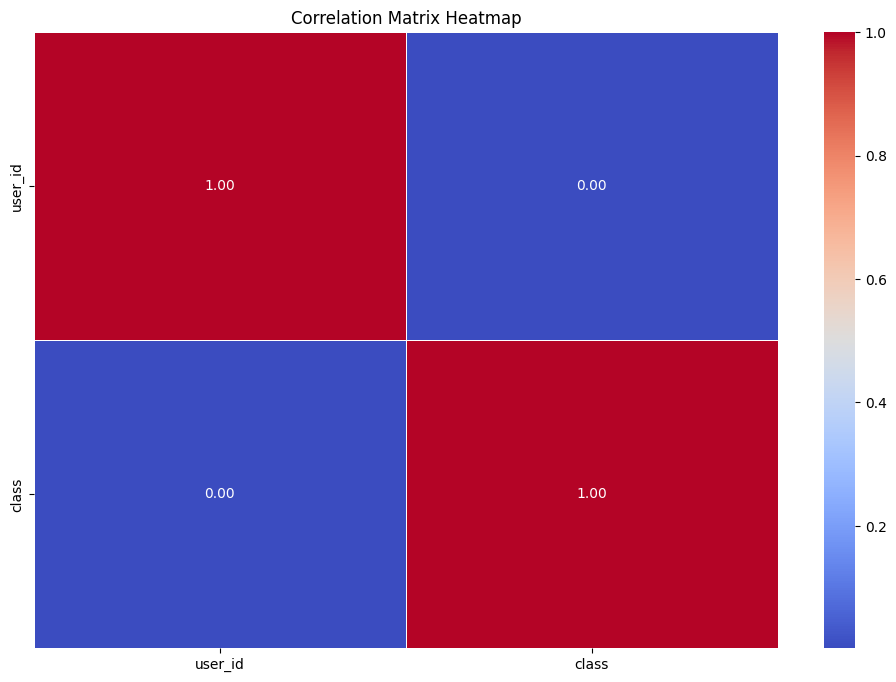

In [12]:
# Call the function to plot the correlation matrix
plot_correlation_matrix(fraud_df_cleaned)

In [13]:
# Step 1: Convert the IP ranges in ip_address_df
ip_address_df_cleaned = convert_ip_to_int(ip_address_df)

In [14]:
# Step 2: Merge fraud data with the cleaned IP address data
merged_fraud_df = merge_ip_country(fraud_df_cleaned, ip_address_df_cleaned)

# Display the first few rows of the merged dataset
print(merged_fraud_df.head())

   user_id         signup_time       purchase_time  purchase_value  \
0   138208 2015-06-10 07:02:20 2015-07-21 02:03:53              20   
1   329438 2015-02-07 20:36:48 2015-02-28 21:43:52              18   
2   319411 2015-01-08 11:11:50 2015-03-06 23:37:00              36   
3    24894 2015-01-07 05:59:11 2015-01-07 05:59:12              35   
4   368181 2015-02-28 18:28:52 2015-03-06 16:32:41              35   

       device_id  source  browser sex  age  ip_address  class  \
0  ZINIADFCLHYPG  Direct       IE   M   38 -2147483648      0   
1  QSHYBRYJBNKMU     SEO       IE   M   24 -2147483648      0   
2  CJHWRXISOAYTL     SEO       IE   M   48 -2147483648      0   
3  NWREMPUXZSXWE     SEO  FireFox   F   46 -2147483648      1   
4  HNQIPDXVRNDZU  Direct   Chrome   M   29 -2147483648      0   

   lower_bound_ip_address  upper_bound_ip_address    country  
0             -2147483648             -2147483648  Singapore  
1             -2147483648             -2147483648  Singapore  

In [15]:
# Save the merged dataframe to a CSV file
merged_fraud_df.to_csv('../data/merged_fraud_data2.csv', index=False)
print(merged_fraud_df.dtypes)

user_id                            int64
signup_time               datetime64[ns]
purchase_time             datetime64[ns]
purchase_value                     int32
device_id                       category
source                          category
browser                         category
sex                             category
age                                int32
ip_address                         int32
class                              int64
lower_bound_ip_address             int32
upper_bound_ip_address             int32
country                           object
dtype: object


In [17]:
# Step 4: Feature Engineering with transaction frequency and velocity
fraud_df_fe = feature_engineering(merged_fraud_df)
fraud_df_fe.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,lower_bound_ip_address,upper_bound_ip_address,country,time_to_purchase,hour_of_day,day_of_week,transaction_count,transaction_velocity
634,247547,2015-06-28 03:00:34,2015-08-09 03:57:29,47,KIXYSVCHIPQBR,SEO,Safari,F,30,16778864,0,16778240.0,16779263.0,Australia,3632215.0,3,6,1,0.000013
635,220737,2015-01-28 14:21:11,2015-02-11 20:28:28,15,PKYOWQKWGJNJI,SEO,Chrome,F,34,16842045,0,16809984.0,16842751.0,Thailand,1231637.0,20,2,1,0.000012
636,390400,2015-03-19 20:49:09,2015-04-11 23:41:23,44,LVCSXLISZHVUO,Ads,IE,M,29,16843656,0,16843264.0,16843775.0,China,1997534.0,23,5,1,0.000022
637,69592,2015-02-24 06:11:57,2015-05-23 16:40:14,55,UHAUHNXXUADJE,Direct,Chrome,F,30,16938732,0,16924672.0,16941055.0,China,7640897.0,16,5,1,0.000007
638,174987,2015-07-07 12:58:11,2015-11-03 04:04:30,51,XPGPMOHIDRMGE,SEO,Chrome,F,37,16971984,0,16941056.0,16973823.0,Thailand,10249579.0,4,1,1,0.000005


In [18]:
# Step 6: Encode categorical features
fraud_df_encoded = encode_categorical_features(fraud_df_fe)
fraud_df_encoded.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,age,ip_address,class,lower_bound_ip_address,upper_bound_ip_address,...,source_Ads,source_Direct,source_SEO,browser_Chrome,browser_FireFox,browser_IE,browser_Opera,browser_Safari,sex_F,sex_M
634,247547,2015-06-28 03:00:34,2015-08-09 03:57:29,47,KIXYSVCHIPQBR,30,16778864,0,16778240.0,16779263.0,...,False,False,True,False,False,False,False,True,True,False
635,220737,2015-01-28 14:21:11,2015-02-11 20:28:28,15,PKYOWQKWGJNJI,34,16842045,0,16809984.0,16842751.0,...,False,False,True,True,False,False,False,False,True,False
636,390400,2015-03-19 20:49:09,2015-04-11 23:41:23,44,LVCSXLISZHVUO,29,16843656,0,16843264.0,16843775.0,...,True,False,False,False,False,True,False,False,False,True
637,69592,2015-02-24 06:11:57,2015-05-23 16:40:14,55,UHAUHNXXUADJE,30,16938732,0,16924672.0,16941055.0,...,False,True,False,True,False,False,False,False,True,False
638,174987,2015-07-07 12:58:11,2015-11-03 04:04:30,51,XPGPMOHIDRMGE,37,16971984,0,16941056.0,16973823.0,...,False,False,True,True,False,False,False,False,True,False


In [19]:
# Step 7: Normalize and scale numerical features
scaled_fraud_df = normalize_and_scale(fraud_df_encoded, ['purchase_value', 'age', 'time_to_purchase'])
scaled_fraud_df.head()


,user_id,signup_time,purchase_time,purchase_value,device_id,age,ip_address,class,lower_bound_ip_address,upper_bound_ip_address,...,source_Ads,source_Direct,source_SEO,browser_Chrome,browser_FireFox,browser_IE,browser_Opera,browser_Safari,sex_F,sex_M
634,247547,2015-06-28 03:00:34,2015-08-09 03:57:29,0.549607,KIXYSVCHIPQBR,-0.363124,16778864,0,16778240.0,16779263.0,...,False,False,True,False,False,False,False,True,True,False
635,220737,2015-01-28 14:21:11,2015-02-11 20:28:28,-1.197335,PKYOWQKWGJNJI,0.101168,16842045,0,16809984.0,16842751.0,...,False,False,True,True,False,False,False,False,True,False
636,390400,2015-03-19 20:49:09,2015-04-11 23:41:23,0.385831,LVCSXLISZHVUO,-0.479197,16843656,0,16843264.0,16843775.0,...,True,False,False,False,False,True,False,False,False,True
637,69592,2015-02-24 06:11:57,2015-05-23 16:40:14,0.986342,UHAUHNXXUADJE,-0.363124,16938732,0,16924672.0,16941055.0,...,False,True,False,True,False,False,False,False,True,False
638,174987,2015-07-07 12:58:11,2015-11-03 04:04:30,0.767974,XPGPMOHIDRMGE,0.449387,16971984,0,16941056.0,16973823.0,...,False,False,True,True,False,False,False,False,True,False
